<a href="https://colab.research.google.com/github/mihiryadav20/Lung_nodules/blob/main/ly_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("lung nodule detection project")

lung nodule detection project


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 


In [ ]:
import glob

ONE HOT ENCODING 


In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal
'''One hot encoding is a process by which categorical 
variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.'''

'One hot encoding is a process by which categorical \nvariables are converted into a form that could be provided to ML algorithms to do a better job in prediction.'

CREATING LISTS

In [ ]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/brain_mri/brain_tumor_dataset/tumour'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/brain_mri/brain_tumor_dataset/healthy"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

 

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

SPLITTING THE DATA INTO TRAIN AND TEST

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

 Creating the CNN model
 

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from  keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
y_train.shape

(111, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 9s 2s/step - loss: 19.8591 - val_loss: 79.5135
Epoch 2/30
3/3 [==============================] - 8s 3s/step - loss: 35.4424 - val_loss: 11.6161
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 7.9247 - val_loss: 30.5347
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 6.2508 - val_loss: 11.4599
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 1.2337 - val_loss: 4.6654
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 2.3574 - val_loss: 12.0316
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 2.9076 - val_loss: 10.3393
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 0.7698 - val_loss: 4.3706
Epoch 9/30
3/3 [==============================] - 7s 2s/step - loss: 0.8611 - val_loss: 2.6552
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.5094 - val_loss: 1.9686
Epoch 11/30
3/3 [========================

PLOTTING THE LOSSES

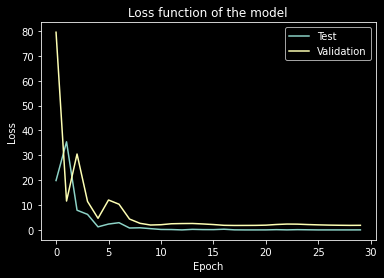

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function of the model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

TO CHECK THE WORKING MODEL

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/images/dataset/tumour/Y100.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
# imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99927282333374% Confidence This Is Its a Tumor
